In [1]:
from utils.sql_utils import DB
from utils.data_utils import IDMT
import psycopg2

In [2]:
db = DB()
idmt = IDMT()

In [4]:
paths = idmt.getFilePaths()

In [6]:
s = '''
CREATE TABLE IF NOT EXISTS test (
    index integer PRIMARY KEY,
    audio BYTEA NOT NULL
)
'''

db.cursor.execute(s)
db.conn.commit()

In [7]:
def write_blob(db,index,audio):

    s = 'insert into test(index,audio) values (%s,%s)'

    try:
        db.cursor.execute(s,(index,audio))
        db.conn.commit()
    except(Exception, psycopg2.DataError) as error:
        print(error)
    finally:
        pass

In [8]:
audio = idmt.extractAudio(paths[0])
blob = psycopg2.Binary(audio)

In [9]:
write_blob(db,1,blob)

In [19]:
def read_blob():
    pass

In [11]:
s = '''
SELECT * FROM test
ORDER BY index ASC 
'''

db.cursor.execute(s)
data = db.cursor.fetchall()

In [18]:
index,extracted_blob = data[0]

In [17]:
blob

In [19]:
index

1

In [16]:
extracted_blob

In [21]:
import numpy as np

In [24]:
decoded_blob = np.frombuffer(extracted_blob, dtype=np.float32)

In [25]:
import matplotlib.pyplot as plt

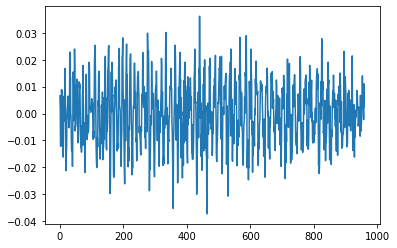

In [26]:
plt.plot(audio)

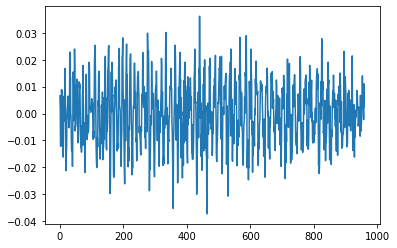

In [27]:
plt.plot(decoded_blob)